In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

In [2]:
noble_redo = pd.read_csv(r"C:\Users\maria\OneDrive\Desktop\nobel-prize-laureates.csv", delimiter=";", encoding='utf-8')
noble_redo.columns

Index(['Id', 'Firstname', 'Surname', 'Born', 'Died', 'Born country',
       'Born country code', 'Born city', 'Died country', 'Died country code',
       'Died city', 'Gender', 'Year', 'Category', 'Overall motivation',
       'Motivation', 'Organization name', 'Organization city',
       'Organization country', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

In [3]:
noble_redo.head(5).T

,0,1,2,3,4
Id,148,82,446,666,203
Firstname,Frederick,Nicolay G.,Edmond H.,Camilo José,Artturi
Surname,Reines,Basov,Fischer,Cela,Virtanen
Born,1918-03-16,1922-12-14,1920-04-06,1916-05-11,1895-01-15
Died,1998-08-26,2001-07-01,2021-08-27,2002-01-17,1973-11-11
Born country,USA,USSR (now Russia),China,Spain,Russian Empire (now Finland)
Born country code,US,RU,CN,ES,FI
Born city,Paterson NJ,Usman,Shanghai,Iria Flavia,Helsinki
Died country,USA,Russia,USA,Spain,Finland
Died country code,US,RU,US,ES,FI


In [4]:
for cols in noble_redo:
    print(f"Column:{cols:35} || type:{str(noble_redo[cols].dtype):7} || missing %: {(noble_redo[cols].isna().sum()/len(noble_redo)*100)}%")

Column:Id                                  || type:int64   || missing %: 0.0%
Column:Firstname                           || type:object  || missing %: 0.0%
Column:Surname                             || type:object  || missing %: 3.260869565217391%
Column:Born                                || type:object  || missing %: 4.644268774703558%
Column:Died                                || type:object  || missing %: 32.509881422924906%
Column:Born country                        || type:object  || missing %: 3.260869565217391%
Column:Born country code                   || type:object  || missing %: 3.260869565217391%
Column:Born city                           || type:object  || missing %: 3.458498023715415%
Column:Died country                        || type:object  || missing %: 33.99209486166008%
Column:Died country code                   || type:object  || missing %: 33.99209486166008%
Column:Died city                           || type:object  || missing %: 34.58498023715415%
Column:Gender  

In [5]:
        # Data Cleaning
noble_redo['Born'] = pd.to_datetime(noble_redo['Born'])
noble_redo['Died'] = pd.to_datetime(noble_redo['Died'])

noble_redo['Born_Year'] = noble_redo['Born'].dt.year
noble_redo['Died_Year'] = noble_redo['Died'].dt.year
noble_redo['Age'] = noble_redo['Died_Year'] - noble_redo['Born_Year']
noble_redo['Age_GetPrize'] = noble_redo['Year'] - noble_redo['Born_Year']

In [6]:
def citizen_status(status):
    if status['Born country'] != status['Organization country']:
        return "Immigrant Laurates"
    else:
        return "Total Laurates"
noble_redo['status'] = noble_redo.apply(citizen_status, axis=1)
noble_redo[['Born country','Organization country','status']].head(5)

,Born country,Organization country,status
0,USA,USA,Total Laurates
1,USSR (now Russia),USSR (now Russia),Total Laurates
2,China,USA,Immigrant Laurates
3,Spain,NaN,Immigrant Laurates
4,Russian Empire (now Finland),Finland,Immigrant Laurates


In [7]:
def age_groups(age):
    if age >= 15 and age <= 30:
        return "15-30"
    elif age > 30 and age <= 45:
        return "30-45"
    elif age > 45 and age <= 60:
        return "45-60"
    elif age > 60 and age <= 75:
        return "60-75"
    elif age > 75 and age <=90:
        return "75-90"
    elif age > 90 and age <=105:
        return "90-105"
    else:
        return "Not Disclosed"
noble_redo['Age_groups'] = noble_redo['Age_GetPrize'].apply(age_groups)
noble_redo[['Age_GetPrize', 'Age_groups']].head(5)

,Age_GetPrize,Age_groups
0,77.0,75-90
1,42.0,30-45
2,72.0,60-75
3,73.0,60-75
4,50.0,45-60


In [8]:
def Years_Decade(years):
    if years >= 1900 and years < 1910:
        return "1900s"
    elif years >= 1910 and years < 1920:
        return "1910s"
    elif years >= 1920 and years < 1930:
        return "1920s"
    elif years >= 1930 and years < 1940:
        return "1930s"
    elif years >= 1940 and years < 1950:
        return "1940s"
    elif years >= 1950 and years < 1960:
        return "1950s"
    elif years >= 1960 and years < 1970:
        return "1960s"
    elif years >= 1970 and years < 1980:
        return "1970s"
    elif years >= 1980 and years < 1990:
        return "1980s"
    elif years >= 1990 and years < 2000:
        return "1990s"
    elif years >= 2000 and years < 2010:
        return "2000s"
    elif years >= 2010 and years < 2020:
        return "2010s"
    else:
        return "N/A"
noble_redo['Year_Decade'] = noble_redo['Year'].apply(Years_Decade)
noble_redo[['Year', 'Year_Decade']]

,Year,Year_Decade
0,1995,1990s
1,1964,1960s
2,1992,1990s
3,1989,1980s
4,1945,1940s
...,...,...
1007,1960,1960s
1008,1995,1990s
1009,1974,1970s
1010,1925,1920s


In [9]:
noble_redo['FullName'] = noble_redo['Firstname'] + " " + noble_redo['Surname']
noble_redo['FullName'].value_counts()

Marie Curie          2
Frederick Sanger     2
Barry Sharpless      2
Linus Pauling        2
John Bardeen         2
                    ..
Henry Taube          1
Lawrence R. Klein    1
Paul Karrer          1
Christian de Duve    1
Frits Zernike        1
Name: FullName, Length: 974, dtype: int64

In [10]:
noble_redo.drop(columns={'Died country code', 'Overall motivation', 'Born_Year', 'Died_Year', 'Firstname', 'Surname'}, inplace=True)
noble_redo.head(5)

,Id,Born,Died,Born country,Born country code,Born city,Died country,Died city,Gender,Year,...,Organization city,Organization country,Geo Shape,geo_point_2d,Age,Age_GetPrize,status,Age_groups,Year_Decade,FullName
0,148,1918-03-16,1998-08-26,USA,US,Paterson NJ,USA,Orange CA,male,1995,...,Irvine CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594509",80.0,77.0,Total Laurates,75-90,1990s,Frederick Reines
1,82,1922-12-14,2001-07-01,USSR (now Russia),RU,Usman,Russia,Moscow,male,1964,...,Moscow,USSR (now Russia),"{""coordinates"": [[[[132.448985222, 42.84540436...","61.98434173753343, 96.69345576745796",79.0,42.0,Total Laurates,30-45,1960s,Nicolay G. Basov
2,446,1920-04-06,2021-08-27,China,CN,Shanghai,USA,Seattle WA,male,1992,...,Seattle WA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594509",101.0,72.0,Immigrant Laurates,60-75,1990s,Edmond H. Fischer
3,666,1916-05-11,2002-01-17,Spain,ES,Iria Flavia,Spain,Madrid,male,1989,...,NaN,NaN,NaN,NaN,86.0,73.0,Immigrant Laurates,60-75,1980s,Camilo José Cela
4,203,1895-01-15,1973-11-11,Russian Empire (now Finland),FI,Helsinki,Finland,Helsinki,male,1945,...,Helsinki,Finland,"{""coordinates"": [[[[22.443695509, 59.85146719]...","64.49602536200206, 26.271352096349112",78.0,50.0,Immigrant Laurates,45-60,1940s,Artturi Virtanen


In [11]:
# Number of men and women 
total_women = len(noble_redo[noble_redo['Gender'] == 'female'])
total_men = len(noble_redo[noble_redo['Gender'] == 'male'])
import plotly.graph_objects as go 
fig = go.Figure(go.Indicator(
    mode = "number",
    value=total_women,
    title={'text': 'Number of women who won the nobel prize', 'font':{'size': 16}},
    domain={'x':[0,1], 'y':[0,1]}
))
fig.update_layout(paper_bgcolor = 'lightpink', height = 400, width = 400)
fig.show()
fig = go.Figure(go.Indicator(
    mode = "number",
    value=total_men,
    title={'text': 'Number of men who won the nobel prize', 'font':{'size': 16}},
    domain={'x':[0,1], 'y':[1,0]}
))
fig.update_layout(paper_bgcolor = 'lightsteelblue', height = 400, width = 400)
fig.show()

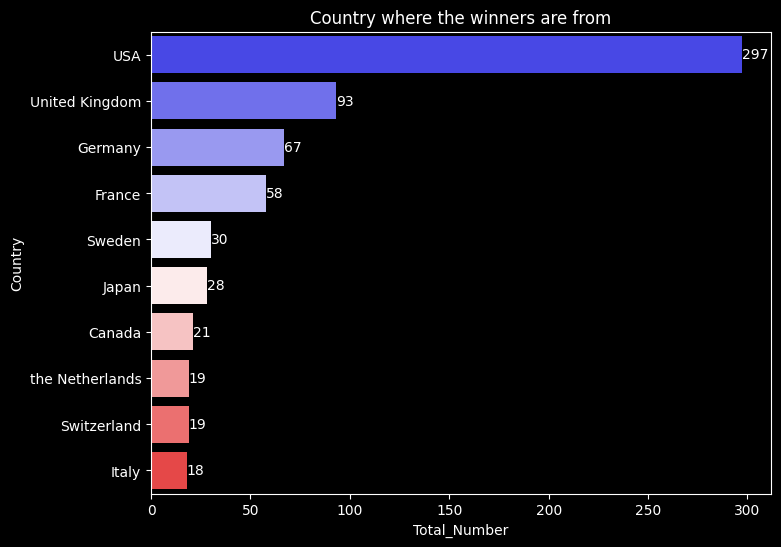

In [12]:
# Country where the winners are from?
country_winners = noble_redo.groupby('Born country')['Id'].size().reset_index(name='Count').sort_values(by='Count', ascending=False)
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(country_winners.head(10), x = 'Count', y = 'Born country', ax = ax, palette='bwr')
ax.set_title('Country where the winners are from')
ax.set(xlabel = 'Total_Number', ylabel= 'Country')
ax.tick_params(axis= 'y', rotation = 0)
for bars in ax.containers:
    ax.bar_label(bars)

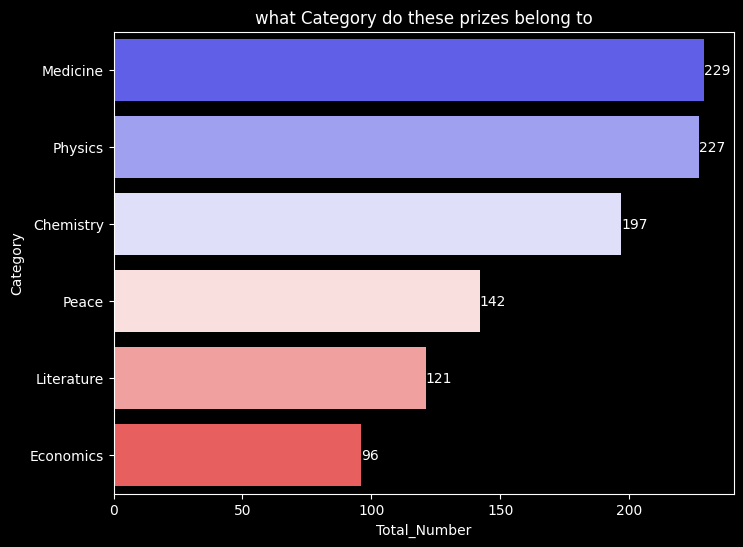

In [13]:
# What Category do these prizes belong to
category_distrubution = noble_redo.groupby('Category')['Id'].size().reset_index(name='Count').sort_values(by='Count', ascending=False)
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(category_distrubution, x = 'Count', y = 'Category', ax = ax, palette='bwr')
ax.set_title('what Category do these prizes belong to')
ax.set(xlabel = 'Total_Number', ylabel= 'Category')
ax.tick_params(axis= 'y', rotation = 0)
for bars in ax.containers:
    ax.bar_label(bars)

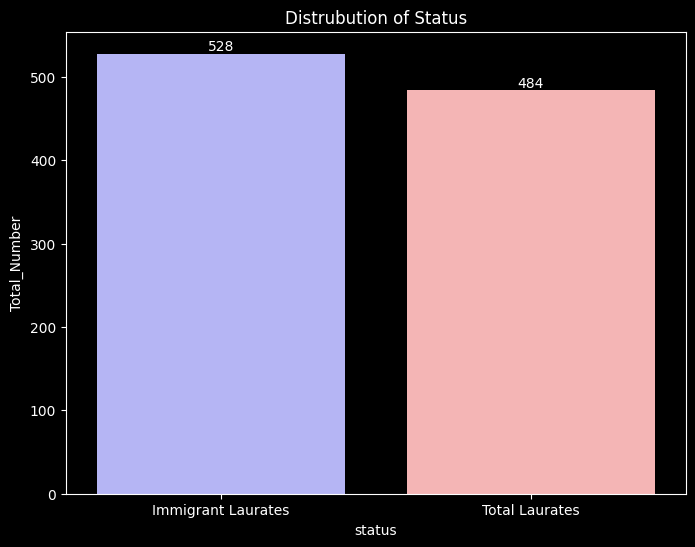

In [14]:
share_status = noble_redo.groupby('status')['Id'].count().reset_index(name='Count')
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(share_status, x = 'status', y = 'Count',ax= ax, palette='bwr')
ax.set_title('Distrubution of Status')
ax.set(xlabel = 'status', ylabel= 'Total_Number')
ax.tick_params(axis= 'y', rotation = 0)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Year_Decade', ylabel='Count'>

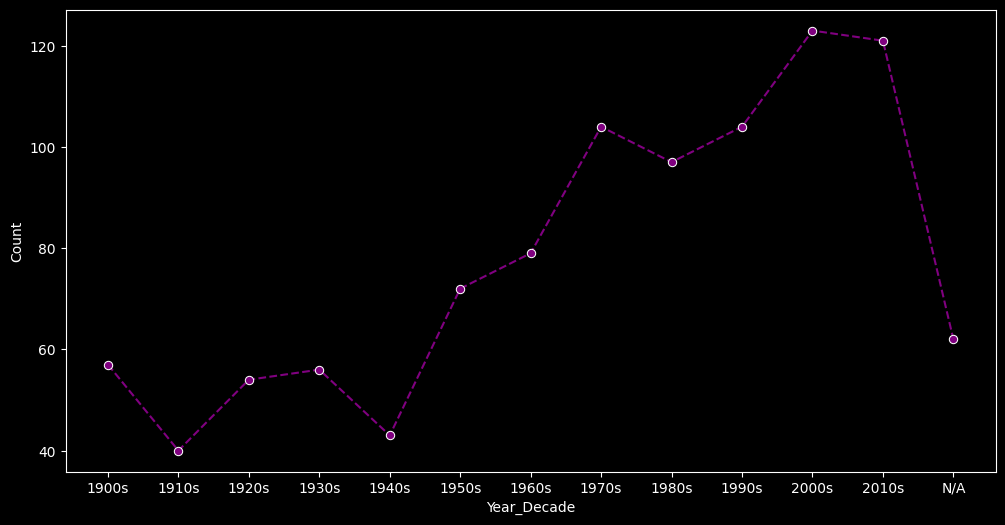

In [15]:
# Trend of wins over the years
fig = plt.subplots(figsize = (12,6))
yearly_trend = noble_redo.groupby('Year_Decade')['Id'].size().reset_index(name = 'Count').sort_values(by='Year_Decade', ascending=True)
sns.lineplot(data=yearly_trend, x = 'Year_Decade', y ='Count', linestyle = '--', marker = 'o', color = 'purple')

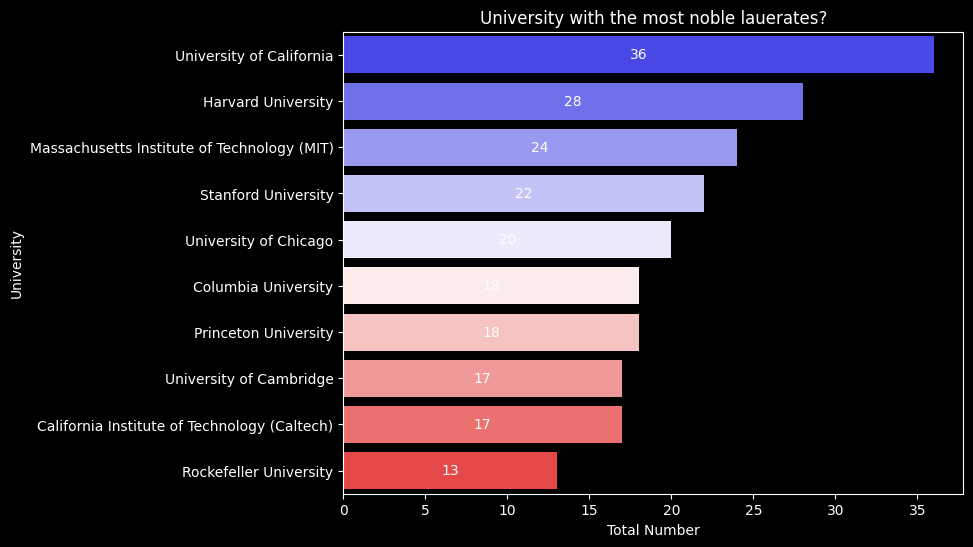

In [16]:
# University with the most noble laureates
University_winners = noble_redo.groupby('Organization name')['Id'].size().reset_index(name='Count').sort_values(by='Count', ascending=False)
fig,ax = plt.subplots(figsize =(8,6))
sns.barplot(University_winners.head(10), x = 'Count', y='Organization name', ax = ax, palette='bwr')
ax.set_title('University with the most noble lauerates?')
ax.set(xlabel = 'Total Number', ylabel = 'University')
ax.tick_params(axis = 'y', rotation = 0)
for bars in ax.containers:
    ax.bar_label(bars, label_type='center')
plt.show()

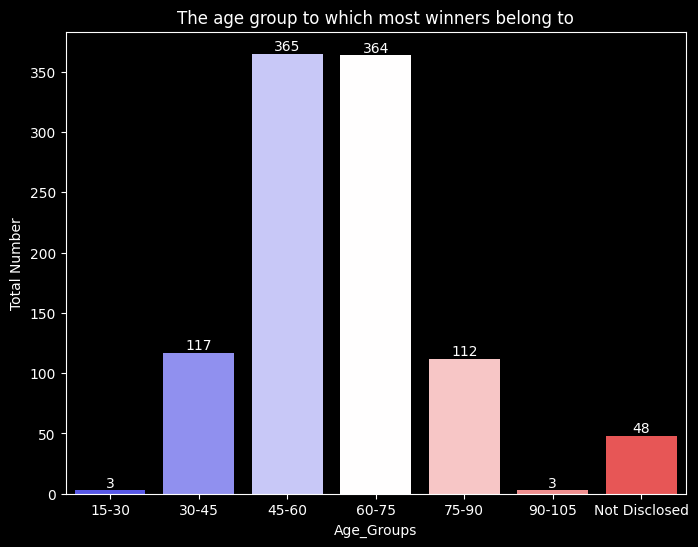

In [17]:
# The age group to which most winners belong
age_winners = noble_redo.groupby('Age_groups')['Id'].size().reset_index(name = 'Count')
fig,ax = plt.subplots(figsize =(8,6))
sns.barplot(age_winners, x ='Age_groups', y = 'Count', ax = ax, palette='bwr')
ax.set_title('The age group to which most winners belong to')
ax.set(xlabel= 'Age_Groups', ylabel= 'Total Number')
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()